<a href="https://colab.research.google.com/github/rosihirales/IO-LITI/blob/main/IO_Modelos_Programaci%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigación de Operaciones
## Modelo Programación Lineal y Método Simplex Tabular

Este notebook tiene como objetivo abordar los conceptos básicos del Modelo Lineal y el Método Simplex Tabular, así como incluir ejemplos y ejercicios prácticos.

###
1. Modelo Lineal

Un **modelo lineal** se define por una función objetivo y una serie de restricciones que deben ser lineales. Un modelo lineal general puede expresarse de la siguiente forma:




Maximizar o Minimizar:  
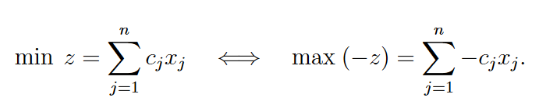

Ejemplo 1. Resolveremos el siguiente problema de maximización usando el método simplex.

Problema: Maximizar la función objetivo
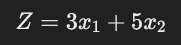

Sujeto a las siguientes restricciones:

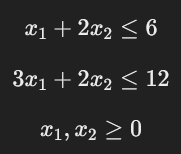


Explicación del Código:
Función Objetivo: Estamos maximizando  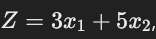pero la función linprog de SciPy minimiza por defecto, por lo que multiplicamos los coeficientes por −1 para obtener una maximización.

Restricciones: Se definen las restricciones 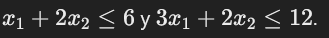

Condiciones de no negatividad: Se especifica que ambas variables x1​ y x2​ deben ser mayores o iguales a 0.

Método: Usamos el método simplex para resolver el problema.

    
    

In [ ]:
# Importamos las librerías necesarias
from scipy.optimize import linprog

# Coeficientes de la función objetivo (Maximizar Z = 3x1 + 5x2 -> minimizar -Z = -3x1 - 5x2)
c = [-3, -5]

# Matriz de las restricciones (A_ub para restricciones <=)
A = [
    [1, 2],   # x1 + 2x2 <= 6
    [3, 2]    # 3x1 + 2x2 <= 12
]

# Vector de valores límite de las restricciones
b = [6, 12]

# Restricciones de no negatividad (x1, x2 >= 0)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Resolver el problema de programación lineal
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

# Mostramos los resultados
print(f'Valor óptimo de la función objetivo: {-res.fun}')
print(f'Valores óptimos de las variables: x1 = {res.x[0]}, x2 = {res.x[1]}')


Valor óptimo de la función objetivo: 16.5
Valores óptimos de las variables: x1 = 3.0, x2 = 1.4999999999999998


<ipython-input-11-80dd48f8cfbe>:21: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


### **2. Método Simplex Tabular**

El **método simplex** es un algoritmo usado para resolver problemas de programación lineal. Utiliza una tabla para realizar iteraciones y mejorar la solución de manera sistemática hasta encontrar el valor óptimo.

#### Pasos para aplicar el método simplex:

1. **Convertir a igualdad:** Si las restricciones son desigualdades, conviértalas en igualdades agregando variables de holgura.
2. **Formar la tabla inicial:** Incluir las variables de decisión y de holgura en la tabla.
3. **Seleccionar columna pivote:** La columna con el coeficiente más negativo en la fila Z.
4. **Seleccionar fila pivote:** Se selecciona con base en el menor valor del cociente entre el lado derecho y el coeficiente de la columna pivote.
5. **Actualizar la tabla:** Se divide la fila pivote y se ajustan las demás filas.
6. **Repetir hasta obtener una solución óptima.*

In [ ]:
# En este ejemplo, vamos a resolver el siguiente problema de Programación Lineal con el método
# simplex tabular:

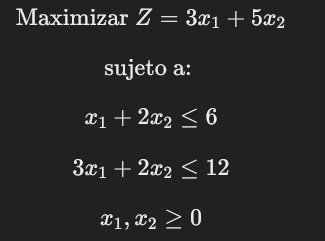

#Explicación del código

**Función simplex**: Implementa el método simplex tabular. Acepta como entrada el vector de la función objetivo c, la matriz de coeficientes A de las restricciones, y el vector de valores b (lado derecho de las restricciones).

**Tabla inicial:** Creamos la tabla aumentada donde se incluyen las variables de holgura. La última fila corresponde a la función objetivo.

**Bucle simplex:** Mientras haya coeficientes negativos en la función objetivo (indicando que el óptimo no se ha alcanzado) seleccionamos la columna de entrada (variable que entra en la base) y la fila de salida (variable que sale de la base) usando la regla de mínima razón (theta).

**Impresión de tablas:** En cada iteración, mostramos la tabla utilizando pandas y generamos un gráfico con matplotlib para que puedas visualizar cómo cambian las tablas a lo largo del proceso.

Cuando ejecutes el código en Google Colab, verás las tablas inicial y las subsecuentes en cada iteración, tanto en formato de DataFrame como en gráfico. Esto te permitirá seguir paso a paso cómo el método simplex va encontrando la solución óptima.

#Uso de bibliotecas

**Matplotlib:** Para la visualización de tablas como gráficos.

**Pandas:** Para manipulación y visualización de datos tabulares.

#Interpretación del resultado

Al finalizar el proceso, el tableau final contendrá la solución óptima en la última columna (columna b) para las variables básicas. Las variables que no son básicas tendrán valor 0.

Este ejemplo resuelve el problema de maximización usando el método simplex tabular y genera las tablas de cada iteración para que sea visualmente claro cómo avanza el algoritmo.

    

    

    

Iteración 0


,x1,x2,s1,s2,b
0,1.0,2.0,1.0,0.0,6.0
1,3.0,2.0,0.0,1.0,12.0
2,-3.0,-5.0,0.0,0.0,0.0


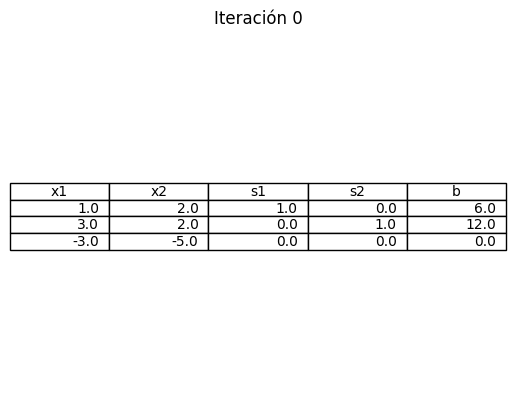

Iteración 1


,x1,x2,s1,s2,b
0,0.5,1.0,0.5,0.0,3.0
1,2.0,0.0,-1.0,1.0,6.0
2,-0.5,0.0,2.5,0.0,15.0


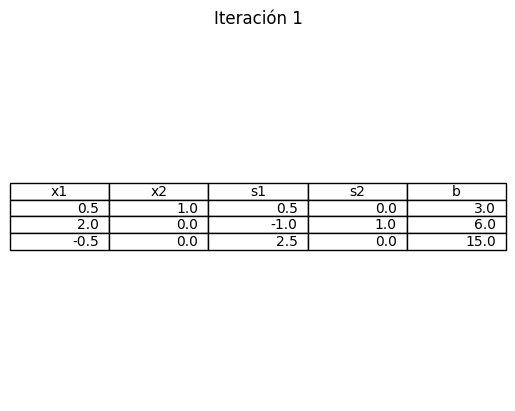

Iteración 2


,x1,x2,s1,s2,b
0,0.0,1.0,0.75,-0.25,1.5
1,1.0,0.0,-0.50,0.50,3.0
2,0.0,0.0,2.25,0.25,16.5


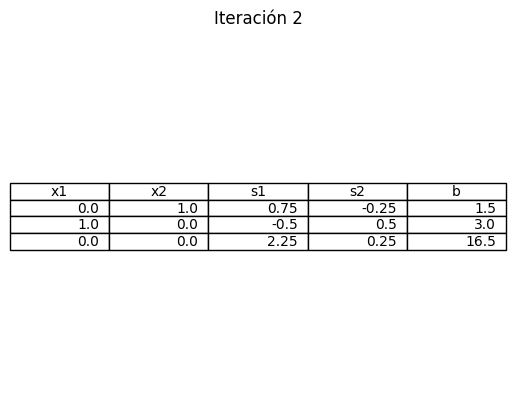

In [ ]:
!pip install matplotlib pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simplex(c, A, b):
    # Crear la tabla inicial (matriz aumentada)
    num_constraints, num_variables = A.shape
    tableau = np.zeros((num_constraints + 1, num_variables + num_constraints + 1))

    # Introducir las restricciones en el tableau
    tableau[:-1, :-1] = np.hstack([A, np.eye(num_constraints)])
    tableau[:-1, -1] = b
    tableau[-1, :num_variables] = -c

    # Función para mostrar las tablas en cada iteración
    def print_tableau(tableau, iteration):
        print(f"Iteración {iteration}")
        columns = [f"x{i+1}" for i in range(num_variables)] + [f"s{i+1}" for i in range(num_constraints)] + ["b"]
        df = pd.DataFrame(tableau, columns=columns)
        display(df)

    # Gráfico de la tabla en cada iteración
    def plot_tableau(tableau, iteration):
        fig, ax = plt.subplots()
        ax.axis('tight')
        ax.axis('off')
        ax.table(cellText=tableau.round(2), colLabels=[f"x{i+1}" for i in range(num_variables)] +
                 [f"s{i+1}" for i in range(num_constraints)] + ["b"], loc="center")
        ax.set_title(f"Iteración {iteration}")
        plt.show()

    iteration = 0
    print_tableau(tableau, iteration)
    plot_tableau(tableau, iteration)

    while np.any(tableau[-1, :-1] < 0):  # Mientras haya un coeficiente negativo en la fila Z
        # Seleccionar la columna de entrada (más negativa en la fila Z)
        entering_column = np.argmin(tableau[-1, :-1])

        # Calcular las razones theta para la columna de salida
        ratios = tableau[:-1, -1] / tableau[:-1, entering_column]
        ratios[ratios <= 0] = np.inf  # Evitar divisiones por cero o negativas
        leaving_row = np.argmin(ratios)

        # Actualizar el tableau con la fila pivote
        pivot = tableau[leaving_row, entering_column]
        tableau[leaving_row, :] /= pivot

        for i in range(tableau.shape[0]):
            if i != leaving_row:
                tableau[i, :] -= tableau[i, entering_column] * tableau[leaving_row, :]

        iteration += 1
        print_tableau(tableau, iteration)
        plot_tableau(tableau, iteration)

    return tableau

# Definición del problema
c = np.array([3, 5])  # Coeficientes de la función objetivo
A = np.array([[1, 2], [3, 2]])  # Coeficientes de las restricciones
b = np.array([6, 12])  # Lado derecho de las restricciones

# Llamada a la función simplex
final_tableau = simplex(c, A, b)


#Análisis de los resultados

 En el método simplex tabular, la fila de la función objetivo (Z) es la última fila de la tabla simplex, donde se encuentran los coeficientes de la función objetivo después de que el problema ha sido transformado en forma estándar. Esta fila se usa para determinar si la solución actual es óptima o si se deben realizar más iteraciones.

 Para una maximización, los coeficientes en esta fila representan los valores de las tasas de cambio en la función objetivo. Revisa si todas las columnas de la fila de la función objetivo son no negativas, lo que indica que se ha alcanzado la solución óptima.

